In [1]:
import pandas as pd
import numpy as np

In [5]:
ccn_data = pd.read_csv('CCN_0.5-NaN-time.csv', sep=',',skiprows=0,header=0,na_values=[9999])

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ccn_data.head()

,AMR_lowest,AMR_surf,AOD,B4LI,BJC,CAPE,CAPE_lowest,CAPE_nc,CAPE_surf,CCN_0.5_cm3,...,row,satz,solz,sound_D(km),sound_ID,sound_hour,sumN_0.5,sumN_0.5_sumN_1.0,sumN_1.0,winNO
0,NaN,NaN,NaN,-3.6,2013-06-01 05:09:00,1119.0,NaN,667,NaN,94.0,...,6112,48.06,23.20,NaN,NaN,NaN,891.0,1.01,880.0,501
1,NaN,NaN,NaN,-2.8,2013-06-01 05:09:00,559.0,NaN,941,NaN,468.0,...,5920,31.90,20.35,NaN,NaN,NaN,306.0,1.00,306.0,708
2,NaN,NaN,NaN,-3.2,2013-06-01 05:09:00,812.0,NaN,941,NaN,688.0,...,5920,28.89,19.91,NaN,NaN,NaN,1652.0,1.00,1652.0,709
3,NaN,NaN,NaN,-6.9,2013-06-01 05:09:00,2822.0,NaN,1904,NaN,1337.0,...,6112,-0.48,16.26,NaN,NaN,NaN,171.0,1.00,171.0,1101
4,NaN,NaN,NaN,-6.9,2013-06-01 05:09:00,2822.0,NaN,1904,NaN,1538.0,...,6112,-3.38,15.92,NaN,NaN,NaN,514.0,1.00,514.0,1102


In [7]:
data=ccn_data.set_index('BJC')

In [8]:
data.size

15859800

In [9]:
time=data.index.drop_duplicates()

In [10]:
time.size

346

In [11]:
data1=data

In [12]:
step = 0.5
to_bin = lambda x: np.floor(x / step) * step
data1["lat_bin"] = data1.lat.map(to_bin)
data1["lon_bin"] = data1.lon.map(to_bin)
groups = data1.groupby(("lat_bin", "lon_bin"))
#avg_data=all_data.set_index(['latbin', 'lonbin']).stack().groupby(level=[0, 1]).mean()
avg_data=data1.groupby(['lat_bin','lon_bin']).count()
print(avg_data.head())

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """


                 AMR_lowest  AMR_surf  AOD  B4LI  CAPE  CAPE_lowest  CAPE_nc  \
lat_bin lon_bin                                                                
7.0     124.5             0         0    0     2     2            0        2   
        125.5             0         0    0     4     4            0        4   
7.5     124.0             0         0    0     8     8            0        8   
        125.0             0         0    0     2     2            0        2   
8.0     123.5             0         0    0     2     2            0        2   

                 CAPE_surf  CCN_0.5_cm3  CCN_0.5_mg  ...  row  satz  solz  \
lat_bin lon_bin                                      ...                    
7.0     124.5            0            2           2  ...    2     2     2   
        125.5            0            4           4  ...    4     4     4   
7.5     124.0            0            8           8  ...    8     8     8   
        125.0            0            2           2  .

In [13]:
avg_data.to_csv("count_CCN_new.csv",index=True,sep=',')

In [24]:
import os, time, datetime
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

In [26]:
def plotMap():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([105, 130, 20, 46])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn,
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'CCN/cm^3')
    plt.clim(0,150)
# make legend with dummy points
    plt.title("2013-2018 Summer", fontsize=20)
    return fig, ax

141
1


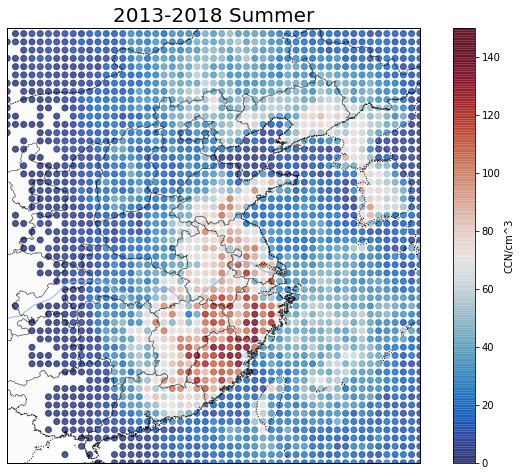

In [39]:
# Extract the data we're interested in
lat=avg_data.index.get_level_values(0)
lon=avg_data.index.get_level_values(1)
ccn = avg_data['CCN_1.0_cm3'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)

fig, ax= plotMap()
plt.savefig('count_CCN.png',dpi=200)

In [42]:
data_10=avg_data[avg_data['CCN_1.0_cm3']>=10]

In [44]:
ccn= data_10['CCN_1.0_cm3'].values

In [45]:
lat=data_10.index.get_level_values(0)
lon=data_10.index.get_level_values(1)

In [46]:
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
print(ccn_max)
ccn_min=np.nanmin(ccn)
print(ccn_min)

141
10


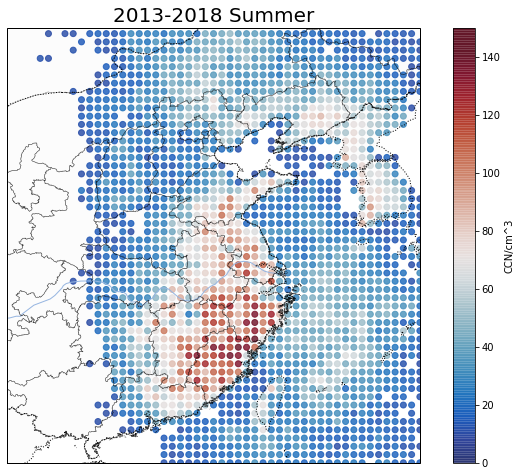

In [48]:
fig, ax= plotMap()
plt.savefig('count_CCN10.png',dpi=200)

In [3]:
cities=pd.read_table("1allsum-0.5-NaN-b2_850hpa.csv",sep=',',na_values=[-9999])
#cities=cities[cities['Count']>=10]
cities=cities[0<=cities['WDIR850']]
cities=cities[cities['WDIR850']<=90]
cities['CCN_1.0_cm3'].shape

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


(265,)